In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from GetAprilTrainTestData import GetAprilTrainTestData

In [2]:
X, y = GetAprilTrainTestData()

13413 13413


In [3]:
# Now need to one hot encode all the stuff in X that is categorical. 
X = pd.get_dummies(X)
print("Shape", X.shape)

Shape (13413, 3947)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
print(len(X_train), len(y_train), len(X_test), len(y_test))

10059 10059 3354 3354


In [5]:
# Scale the data. This may not be necessary for linear regressions, but will be if I go to some other scheme
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
# Tranform all of the data based on the scaler fit calculated above
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [6]:
print(len(X_train_scaled), len(y_train_scaled), len(X_test_scaled), len(y_test_scaled))
print("Number of features = ", len(X_train_scaled[0]))

10059 10059 3354 3354
Number of features =  3947


In [7]:
def build_keras_regressor():
    from keras.models import Sequential
    from keras.layers import Dense
    model = Sequential()
    # Create keras input layer and first hidden layer
    number_inputs = len(X_train_scaled[0])
    number_hidden_nodes = 100
    activation_fn="softplus"
    model.add(Dense(units=number_hidden_nodes, activation=activation_fn, input_dim=number_inputs))
    model.add(Dense(units=number_hidden_nodes, activation=activation_fn))
    model.add(Dense(units=number_hidden_nodes, activation=activation_fn))
    model.add(Dense(units=number_hidden_nodes, activation=activation_fn))
    model.add(Dense(units=number_hidden_nodes, activation=activation_fn))
    # Create keras output layer. There is no activation function since we want values directly
    model.add(Dense(units=1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics = ["mae", "accuracy"])
    print(model.summary(), activation="relu")
    return model

In [8]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_keras_regressor, batch_size=20,  epochs=100)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [25]:
results = regressor.fit(X_train_scaled, y_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               274400    
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 314,901
Trainable params: 314,901
Non-trainable params: 0
_________________________________________________________________
None

In [10]:
regressor.score(X_test_scaled, y_test_scaled)

AttributeError: 'KerasRegressor' object has no attribute 'model'

In [11]:
predictions= regressor.predict(X_test_scaled)

AttributeError: 'KerasRegressor' object has no attribute 'model'

In [28]:
X_train_recovered = X_scaler.inverse_transform(X_train_scaled)
X_test_recovered = X_scaler.inverse_transform(X_test_scaled)
y_train_recovered = y_scaler.inverse_transform(y_train_scaled)
y_test_recovered = y_scaler.inverse_transform(y_test_scaled)
predictions_recovered = y_scaler.inverse_transform(predictions)

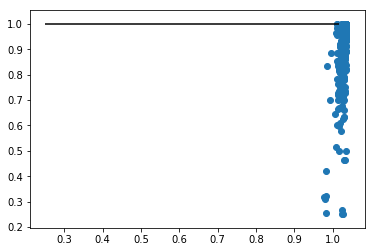

In [29]:
plt.scatter(predictions_recovered, np.concatenate(y_test_recovered, axis=0))
plt.hlines(y=1, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [30]:
X_test_recovered[0]

array([8.00000000e+00, 3.20000000e+01, 3.92000000e+02, ...,
       0.00000000e+00, 2.16840434e-19, 1.00000000e+00])

In [31]:
y_test_recovered

array([[0.844],
       [0.817],
       [0.996],
       ...,
       [0.905],
       [0.993],
       [0.95 ]])

In [32]:
predictions_recovered

array([1.0277036, 1.0231518, 1.033953 , ..., 1.0270336, 1.0334805,
       1.0272079], dtype=float32)

In [33]:
out_df=pd.DataFrame(X_test_recovered)
out_df.columns=X.columns
out_df["MSYE"] = list(np.concatenate(y_test_recovered, axis=0))
out_df["Predictions"] = predictions_recovered
out_df.head()

,SETUP_TIME,CYCLES,TESTED_UNITS,RESCREEN_RULE,MSE_RULE,SPC_RULE,INDEX_RULE,MCBJ_RULE,SETUPTIME_RULE,MSE_UNIT,...,TESTERHEAD_vl76_2,TESTERHEAD_vl91_1,TESTERHEAD_vl93_1,TESTERHEAD_vl95_1,TESTERHEAD_vl98_1,TESTERHEAD_vl99_1,TESTERHEAD_vl9_1,LOTSCREENTYPE_FIRST_PASS,MSYE,Predictions
0,8.0,32.0,392.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000,...,0.0,0.0,0.0,2.168404e-19,0.0,0.0,2.168404e-19,1.0,0.844,1.027704
1,2985.4,35.0,164.0,1.0,1.0,1.0,1.0,1.0,1.110223e-16,1.000,...,0.0,0.0,0.0,2.168404e-19,0.0,0.0,2.168404e-19,1.0,0.817,1.023152
2,18.9,420.0,959.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,0.998,...,0.0,0.0,0.0,2.168404e-19,0.0,0.0,2.168404e-19,1.0,0.996,1.033953
3,26.3,1157.0,14103.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,0.949,...,0.0,0.0,0.0,2.168404e-19,0.0,0.0,2.168404e-19,1.0,0.995,1.033793
4,2.0,159.0,1439.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,0.999,...,0.0,0.0,0.0,2.168404e-19,0.0,0.0,2.168404e-19,1.0,0.999,1.031703


In [34]:
out_df.to_csv("data/product_test_data_KerasNeuralNet.csv")